
 Confusion Matrix:
          Pred YES  Pred NO
True YES        42       20
True NO          4       99

 Classification Report:
              precision  recall  f1-score  support
YES               0.913   0.677     0.778   62.000
NO                0.832   0.961     0.892  103.000
accuracy          0.855   0.855     0.855    0.855
macro avg         0.872   0.819     0.835  165.000
weighted avg      0.862   0.855     0.849  165.000

 Automated Interpretation:
- Accuracy: 85.45%
- Precision (YES): 0.91
- Recall (YES): 0.68
- Precision (NO): 0.83
- Recall (NO): 0.96
- The model is conservative: avoids calling something 'compliant' unless it's very sure.


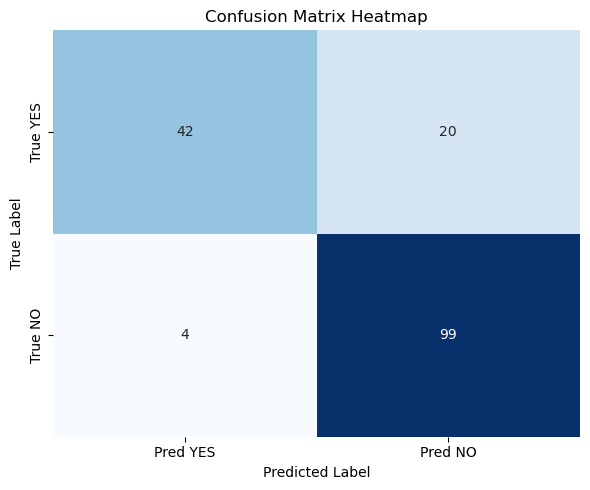

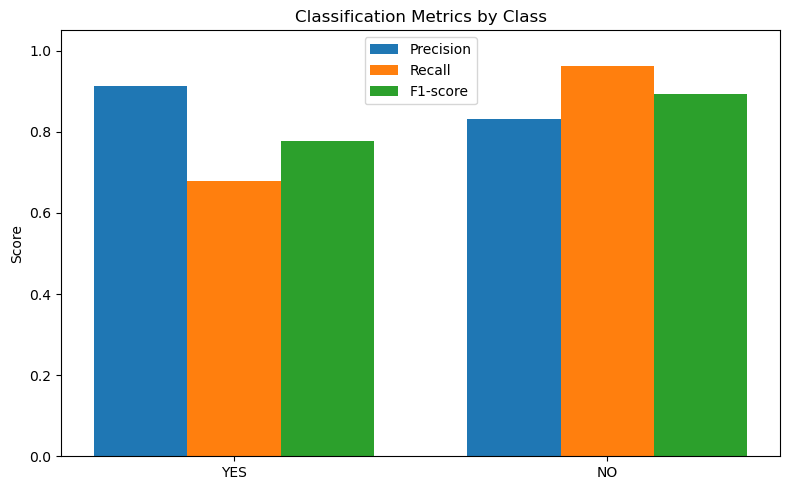

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

file_path = "Confusion-Matrix-Data.xlsx"
df = pd.read_excel(file_path)

df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df = df.map(lambda x: str(x).strip().upper())

y_true = df["MAJORITY_VOTE"]
y_pred = df["CHATGPT_SELF-COMPLIANCE"]
labels = ["YES", "NO"]

cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, index=[f"True {l}" for l in labels], columns=[f"Pred {l}" for l in labels])

print("\n Confusion Matrix:")
print(cm_df)

report = classification_report(y_true, y_pred, labels=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(3)

print("\n Classification Report:")
print(report_df)

print("\n Automated Interpretation:")
print(f"- Accuracy: {round(report['accuracy'] * 100, 2)}%")
print(f"- Precision (YES): {report['YES']['precision']:.2f}")
print(f"- Recall (YES): {report['YES']['recall']:.2f}")
print(f"- Precision (NO): {report['NO']['precision']:.2f}")
print(f"- Recall (NO): {report['NO']['recall']:.2f}")
if report['YES']['recall'] < report['NO']['recall']:
    print("- The model is conservative: avoids calling something 'compliant' unless it's very sure.")
else:
    print("- The model is permissive: tends to predict compliance more easily.")

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

metrics = ["precision", "recall", "f1-score"]
classes = ["YES", "NO"]
scores = [[report[cls][metric] for cls in classes] for metric in metrics]

plt.figure(figsize=(8, 5))
bar_width = 0.25
x = range(len(classes))

for i, metric in enumerate(metrics):
    plt.bar([p + i * bar_width for p in x], scores[i], width=bar_width, label=metric.capitalize())

plt.xticks([p + bar_width for p in x], classes)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Classification Metrics by Class")
plt.legend()
plt.tight_layout()
plt.show()
